In [1]:
import numpy as np
import pandas as pd
import catppuccin
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use(["dark_background", catppuccin.PALETTE.mocha.identifier])
%matplotlib inline

In [2]:
df = pd.read_csv("./datasets/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)


In [8]:
df = pd.concat([df.loc[:, df.columns != "fare_amount"], df["fare_amount"]], axis=1)
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,16.0
...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,3.0
199996,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,7.5
199997,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,30.9
199998,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,14.5


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(200000, 7)

In [10]:
missing = df.isnull().sum()
missing

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
fare_amount          0
dtype: int64

In [11]:
df[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]]

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.738354,-73.999817,40.723217,-73.999512
1,40.728225,-73.994355,40.750325,-73.994710
2,40.740770,-74.005043,40.772647,-73.962565
3,40.790844,-73.976124,40.803349,-73.965316
4,40.744085,-73.925023,40.761247,-73.973082
...,...,...,...,...
199995,40.739367,-73.987042,40.740297,-73.986525
199996,40.736837,-73.984722,40.739620,-74.006672
199997,40.756487,-73.986017,40.692588,-73.858957
199998,40.725452,-73.997124,40.695415,-73.983215


In [12]:
lat_mean = np.mean(df["dropoff_latitude"] - df["pickup_latitude"])
lon_mean = np.mean(df["dropoff_longitude"] - df["pickup_longitude"])

df["dropoff_latitude"] = df["dropoff_latitude"].fillna(df["pickup_latitude"] + lat_mean)
df["dropoff_longitude"] = df["dropoff_longitude"].fillna(
    df["pickup_longitude"] + lon_mean
)

In [13]:
df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    200000 non-null  object 
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   fare_amount        200000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [15]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")
df["pickup_datetime"].isnull().sum()

df["pickup_year"] = df["pickup_datetime"].dt.year
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_day"] = df["pickup_datetime"].dt.day
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["pickup_min"] = df["pickup_datetime"].dt.minute
df.drop(columns=["pickup_datetime"], inplace=True)
df = pd.concat(
    [
        df.loc[:, df.columns != "fare_amount"],
        df["fare_amount"],
    ],
    axis=1,
)
df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_min,fare_amount
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,16.0
...,...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,49,3.0
199996,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,9,7.5
199997,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,42,30.9
199998,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,56,14.5


In [16]:
def detect_outliers(data: pd.DataFrame):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [17]:
for col in [
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "passenger_count",
]:
    print(f"{col}: {np.round(len(detect_outliers(data=df[col])) / len(df) * 100, 2)}%")

pickup_longitude: 6.78%
pickup_latitude: 4.71%
dropoff_longitude: 7.1%
dropoff_latitude: 6.07%
passenger_count: 11.28%


In [18]:
# for col in [
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
# ]:
#     plt.figure(figsize=(16, 8))
#     sns.boxplot(x=df[col])


In [19]:
def handle_outliers(data: pd.Series):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return data.clip(lower_bound, upper_bound)


In [20]:
for col in [
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "passenger_count",
]:
    print(f"{col}:")
    print(f"\tBefore Handling Outliers: [{df[col].min()}, {df[col].max()}]")
    df[col] = handle_outliers(df[col])
    print(f"\tAfter Handling Outliers: [{df[col].min()}, {df[col].max()}]\n")

pickup_longitude:
	Before Handling Outliers: [-1340.64841, 57.418457]
	After Handling Outliers: [-74.02943224999999, -73.92978625000003]

pickup_latitude:
	Before Handling Outliers: [-74.01551500000001, 1644.421482]
	After Handling Outliers: [40.68625237500001, 40.815701375]

dropoff_longitude:
	Before Handling Outliers: [-3356.6663, 1153.5726029999998]
	After Handling Outliers: [-74.0330305, -73.9220345]

dropoff_latitude:
	Before Handling Outliers: [-881.9855130000001, 872.6976279999999]
	After Handling Outliers: [40.682557666351315, 40.8192672227478]

passenger_count:
	Before Handling Outliers: [0, 208]
	After Handling Outliers: [0.0, 3.5]



<Axes: >

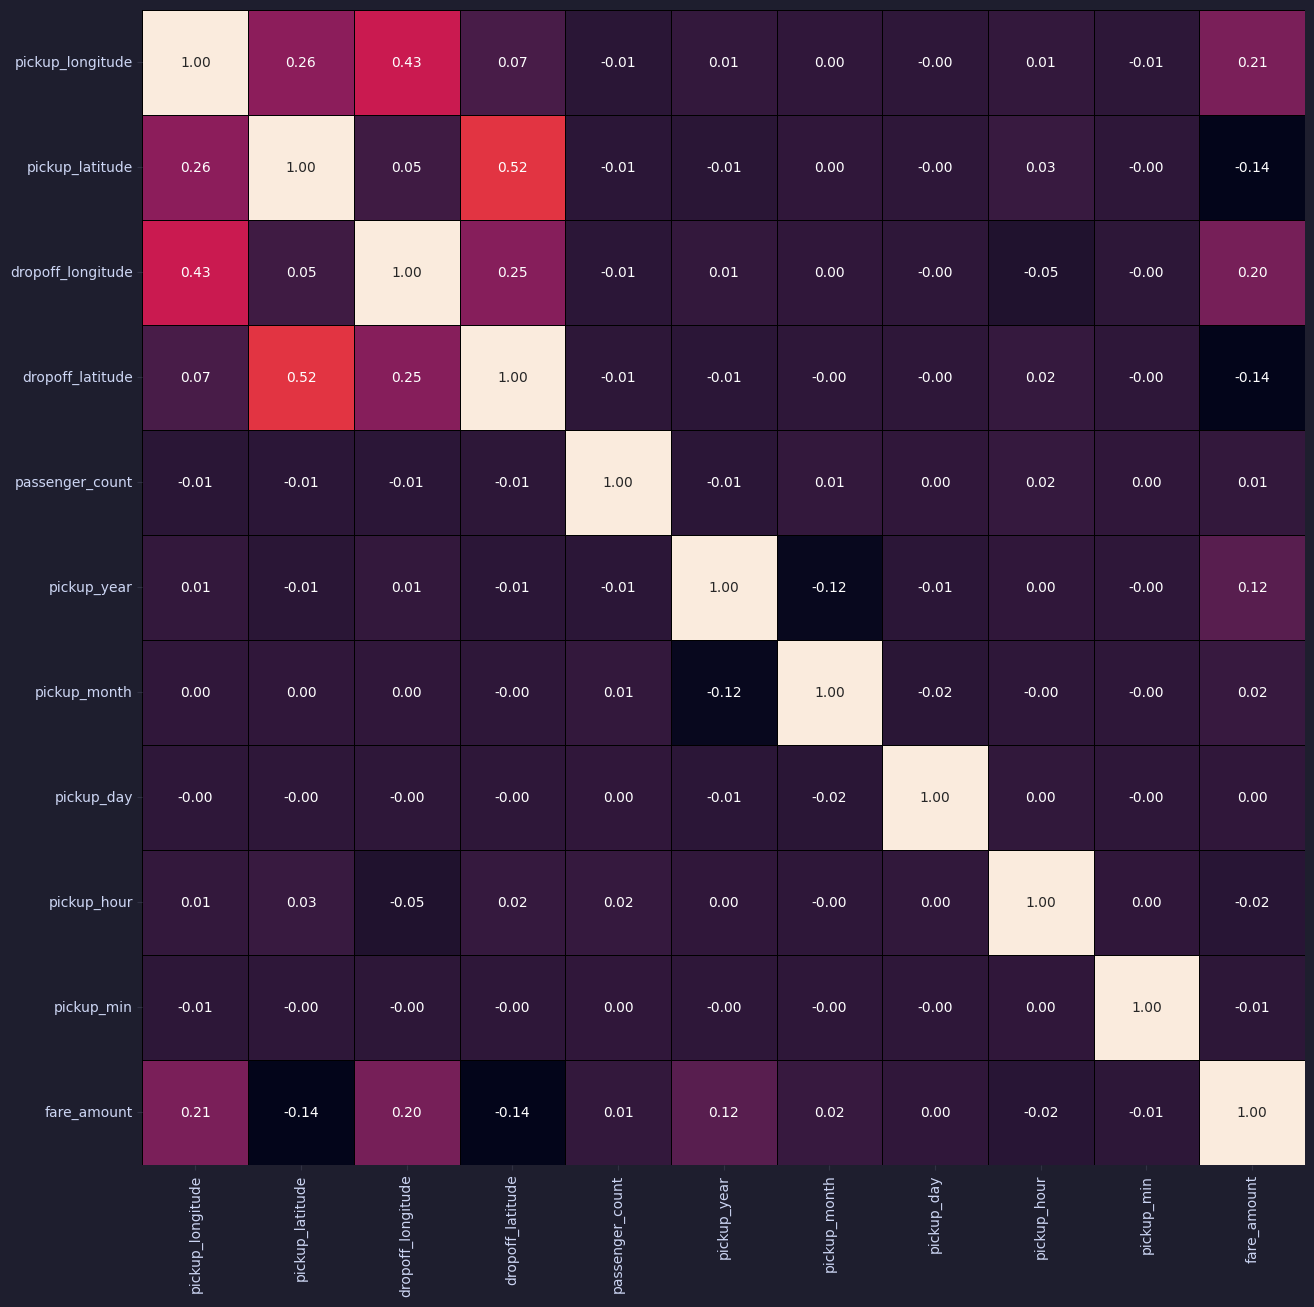

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(
    correlation_matrix,
    cbar=False,
    linecolor="black",
    linewidths=0.5,
    annot=True,
    fmt=".2f",
)

In [22]:
feature_set = (
    correlation_matrix.iloc[-1, :].sort_values(ascending=False)[1:4].reset_index()
)
feature_set.columns = ["feature", "fare_amount"]

feature1, feature2 = tuple(feature_set["feature"][0:2])
print(feature1, feature2)

pickup_longitude dropoff_longitude


In [23]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
standardized_data = scalar.fit_transform(df.loc[:, df.columns != "fare_amount"])

df = pd.DataFrame(
    pd.concat(
        [pd.DataFrame(standardized_data, columns=df.columns[:-1]), df["fare_amount"]],
        axis=1,
    )
)
df


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_min,fare_amount
0,-1.048689,-0.461519,-1.019213,-0.939783,-0.586696,1.754780,-0.372732,-1.001989,0.845469,1.295904,7.5
1,-0.782362,-0.856266,-0.809345,0.006065,-0.586696,-1.477295,0.208846,0.149105,0.998949,-1.472993,7.7
2,-1.303519,-0.367350,0.595614,0.784921,-0.586696,-1.477295,0.499636,0.954871,1.152428,0.892107,12.9
3,0.106600,1.584185,0.475376,1.856170,1.694535,-1.477295,-0.081943,1.185089,-0.842809,-0.434657,5.3
4,2.366074,-0.238154,0.135948,0.387154,2.264843,1.216101,0.499636,1.415308,0.538509,1.007477,16.0
...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.425773,-0.422029,-0.451604,-0.343830,-0.586696,0.138742,1.081214,1.415308,-0.535849,1.122848,3.0
199996,-0.312647,-0.520631,-1.332167,-0.367452,-0.586696,1.216101,-0.954311,-0.196224,-1.917168,-1.184566,7.5
199997,-0.375793,0.245189,2.367077,-2.008486,0.553920,-1.477295,-0.081943,1.530418,-2.070648,0.719051,30.9
199998,-0.917367,-0.964322,-0.306948,-1.909829,-0.586696,1.754780,-0.372732,0.494433,0.078070,1.526646,14.5


In [24]:
target = "fare_amount"
x = df[[feature1]].values
y = df[target].values.ravel()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

y_hat = lr_regressor.predict(X_test)

In [27]:
coef, intercept = lr_regressor.coef_, lr_regressor.intercept_
print(coef, intercept)

[2.102426] 11.35390948049099


In [28]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

lr_mse = mean_squared_error(y_test, y_hat)
lr_rmse = root_mean_squared_error(y_test, y_hat)
lr_r2 = r2_score(y_test, y_hat)

print(lr_mse, lr_rmse, lr_r2)

101.78254450738439 10.088733543284032 0.04268649435884497


Text(0, 0.5, 'Fare Amount')

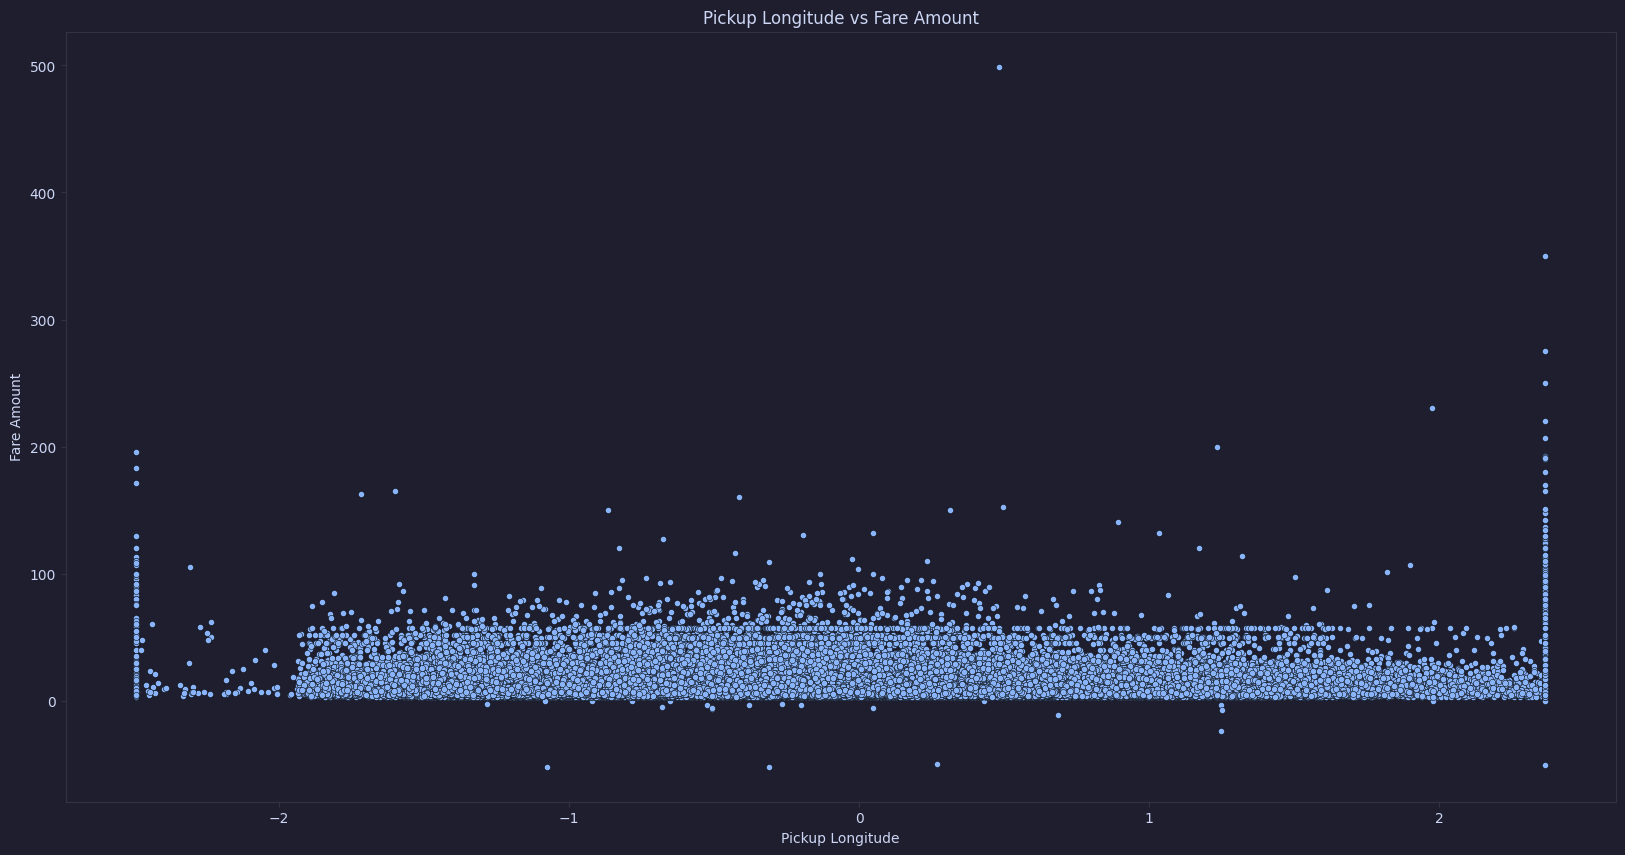

In [29]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df[feature1], y=df[target], edgecolor="black", s=20)
plt.title("Pickup Longitude vs Fare Amount")
plt.xlabel("Pickup Longitude")
plt.ylabel("Fare Amount")

Text(0, 0.5, 'Fare Amount')

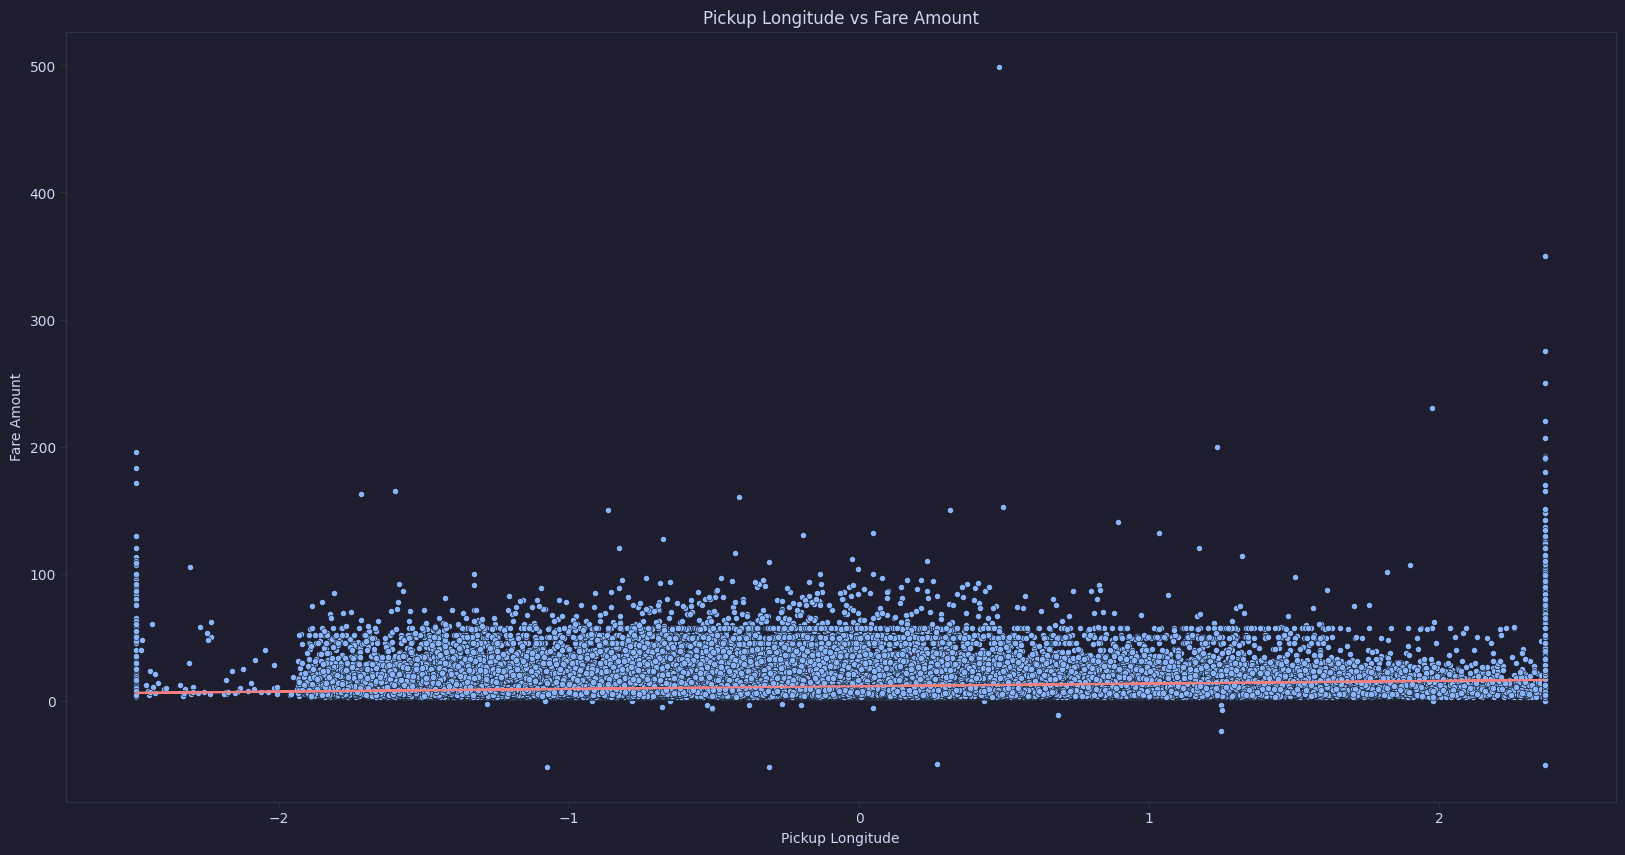

In [30]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df[feature1], y=df[target], edgecolor="black", s=20)
plt.plot(X_train, coef * X_train + intercept, color="lightcoral")
plt.title("Pickup Longitude vs Fare Amount")
plt.xlabel("Pickup Longitude")
plt.ylabel("Fare Amount")

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_hat = rf_regressor.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

rf_mse = mean_squared_error(y_test, y_hat)
rf_rmse = root_mean_squared_error(y_test, y_hat)
rf_r2 = r2_score(y_test, y_hat)

print(rf_mse, rf_rmse, rf_r2)

108.59958214957744 10.421112327845691 -0.02143100471647119


In [33]:
report = {
    "MSE": [lr_mse, rf_mse],
    "RMSE": [rf_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2],
}
report_df = pd.DataFrame(report)
report_df.index = ["LinearRegression", "RandomForestRegressor"]
report_df

,MSE,RMSE,R2 Score
LinearRegression,101.782545,10.421112,0.042686
RandomForestRegressor,108.599582,10.421112,-0.021431
